## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results.csv')
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
set(list(df['tournament']))

{'ABCS Tournament',
 'AFC Asian Cup',
 'AFC Asian Cup qualification',
 'AFC Challenge Cup',
 'AFC Challenge Cup qualification',
 'AFF Championship',
 'AFF Championship qualification',
 'African Cup of Nations',
 'African Cup of Nations qualification',
 'African Nations Championship',
 'African Nations Championship qualification',
 'Amílcar Cabral Cup',
 'Atlantic Cup',
 'Atlantic Heritage Cup',
 'Balkan Cup',
 'Baltic Cup',
 'Brazil Independence Cup',
 'British Championship',
 'CCCF Championship',
 'CECAFA Cup',
 'CFU Caribbean Cup',
 'CFU Caribbean Cup qualification',
 'CONCACAF Championship',
 'CONCACAF Championship qualification',
 'CONCACAF Nations League',
 'CONCACAF Nations League qualification',
 'CONIFA European Football Cup',
 'CONIFA World Football Cup',
 'COSAFA Cup',
 'Confederations Cup',
 'Copa América',
 'Copa América qualification',
 'Copa Artigas',
 "Copa Bernardo O'Higgins",
 'Copa Carlos Dittborn',
 'Copa Chevallier Boutell',
 'Copa Félix Bogado',
 'Copa Juan Pinto D

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [5]:
fifa_games = df[df['tournament'] == 'FIFA World Cup']
fifa_games.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [6]:
home_team = fifa_games[['home_team', 'home_score']]
home_scores = home_team.groupby('home_team').sum().reset_index()
home_scores.columns = ['team', 'home_score']
home_scores

,team,home_score
0,Algeria,5
1,Angola,0
2,Argentina,114
3,Australia,7
4,Austria,30
...,...,...
73,Ukraine,1
74,United Arab Emirates,0
75,United States,12
76,Uruguay,31


In [7]:
away_team = fifa_games[['away_team', 'away_score']]
away_scores = away_team.groupby('away_team').sum().reset_index()
away_scores.columns = ['team', 'away_score']
away_scores

,team,away_score
0,Algeria,8
1,Angola,1
2,Argentina,23
3,Australia,6
4,Austria,13
...,...,...
74,United Arab Emirates,2
75,United States,25
76,Uruguay,56
77,Wales,4


In [8]:
total_score = pd.merge(home_scores, away_scores, on='team')
total_score['total'] = total_score['home_score'] + total_score['away_score']
most_goals = total_score.sort_values('total', ascending=False).head(8)
most_goals

,team,home_score,away_score,total
8,Brazil,177,52,229
27,Germany,158,68,226
2,Argentina,114,23,137
36,Italy,72,56,128
25,France,85,35,120
64,Spain,49,50,99
24,England,50,41,91
74,Uruguay,31,56,87


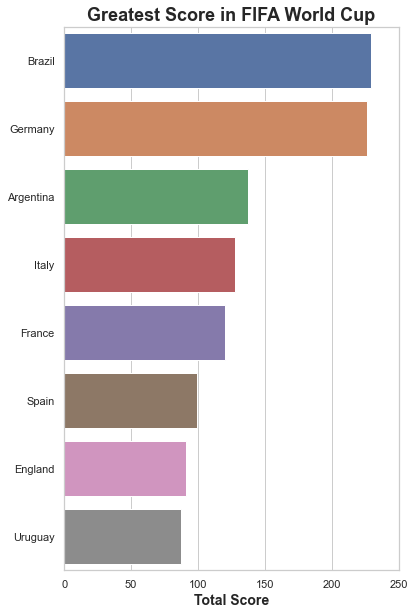

In [9]:
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')

fig, axes = plt.subplots(figsize=(6,10))
sns.barplot(x='total', y='team', data=most_goals)
axes.set_xlim((0, 250))
axes.set_xlabel("Total Score", fontsize=14, fontweight='bold')
axes.set_ylabel("")
axes.set_title("Greatest Score in FIFA World Cup", fontsize=18, fontweight='bold')
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [10]:
matches = df.copy()
matches['year'] = matches['date'].apply(lambda x: int(x.split('-')[0]))
matches['year'] = matches['year'] // 10 * 10

In [11]:
matches = pd.DataFrame(matches.groupby(['year', 'tournament']).count()['date']).reset_index()

In [12]:
matches

,year,tournament,date
0,1870,Friendly,13
1,1880,British Championship,36
2,1880,Friendly,19
3,1890,British Championship,59
4,1900,British Championship,60
...,...,...,...
366,2010,Viva World Cup,29
367,2010,WAFF Championship,44
368,2010,Windward Islands Tournament,12
369,2010,World Unity Cup,4


In [16]:
matches['year'].nunique()
set(list(matches['year']))

{1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010}

In [14]:
matches.columns = ['year', 'tournament', 'counts']

In [45]:
matches = matches[(matches['year'] >= 1920) & (matches['year'] <= 2010)]


In [17]:
import ipywidgets as widgets
from ipywidgets.widgets import interact, interact_manual
import plotly.graph_objects as go


In [46]:
@interact
def bar_plot(year=list(set(list(matches['year'])))):
    data = go.Bar(
            x=matches[matches['year'] == year].sort_values('counts', ascending=False)['tournament'][:10],
            y=matches[matches['year'] == year].sort_values('counts', ascending=False)['counts'],
            textposition='auto'
            
    )
    
    layout = go.Layout(
            title="Tournament Matches in History",
            yaxis_title="Number of Matches",
            template="plotly_white",
            font_family="Arial",
            font_color="black",
            title_font_size=26,
            title_font_family='Arial Black'
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()

interactive(children=(Dropdown(description='year', options=(1920, 1990, 1960, 1930, 2000, 1970, 1940, 2010, 19…

## Task 
Show the trend in number of matches per year.

In [98]:
matches2 = df.copy()
matches2['year'] = matches2['date'].apply(lambda x: int(x.split('-')[0]))
matches2 = matches2.groupby('year').count()
matches_year = matches2['tournament'][28:-1].reset_index()

In [99]:
data = go.Scatter(
    x=matches_year['year'],
    y=matches_year['tournament']
)

layout = go.Layout(
    title='Number of Matches Throughout the Year',
    yaxis_title="Number of Matches",
    xaxis_title="Year",
    template="plotly_white",
    font_family="Arial",
    font_color="black",
    title_font_size=26,
    title_font_family='Arial Black'
)

fig = go.Figure(data, layout)
fig.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [101]:
def winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return "Draw"

In [113]:
df['outcome'] = df.apply(winner, axis=1)
win_count = df.value_counts('outcome').reset_index()
home_team_games = df['home_team'].value_counts().reset_index()
away_team_games = df['away_team'].value_counts().reset_index()

In [138]:
win_count.columns = ['country', 'win_num']
home_team_games.columns = ['country', 'home_matches']
away_team_games.columns = ['country', 'away_matches']

In [158]:
win_count = win_count[1:]
outcome_df = pd.merge(home_team_games, away_team_games, on='country')
outcome_df = outcome_df.merge(win_count, on='country')
outcome_df['total_matches'] = outcome_df['home_matches'] + outcome_df['away_matches']
outcome_df['win_percentage'] = outcome_df['win_num']/outcome_df['total_matches']*100
best_team_df = outcome_df.sort_values('win_percentage', ascending=False)[:10]

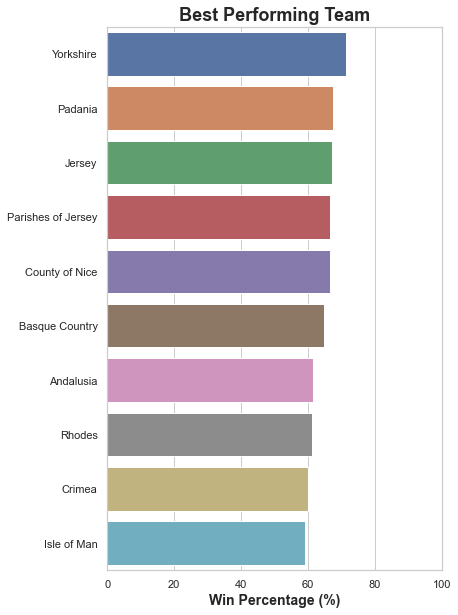

In [159]:
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')

fig, axes = plt.subplots(figsize=(6,10))
sns.barplot(x='win_percentage', y='country', data=best_team_df)
axes.set_xlim((0, 100))
axes.set_xlabel("Win Percentage (%)", fontsize=14, fontweight='bold')
axes.set_ylabel("")
axes.set_title("Best Performing Team", fontsize=18, fontweight='bold')
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [160]:
worst_team_df = outcome_df.sort_values('win_percentage', ascending=True)[:10]

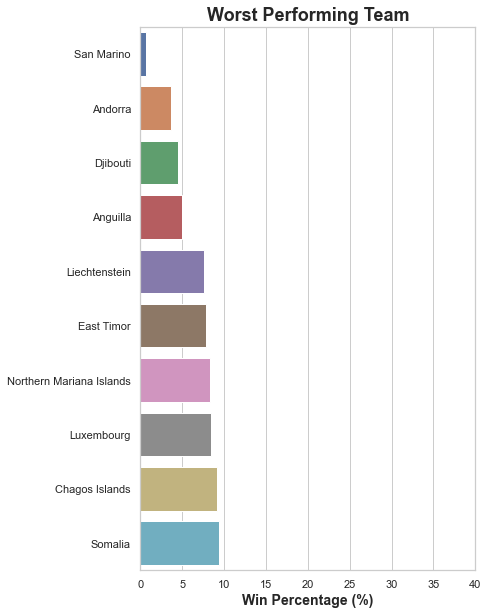

In [163]:
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')

fig, axes = plt.subplots(figsize=(6,10))
sns.barplot(x='win_percentage', y='country', data=worst_team_df)
axes.set_xlim((0, 40))
axes.set_xlabel("Win Percentage (%)", fontsize=14, fontweight='bold')
axes.set_ylabel("")
axes.set_title("Worst Performing Team", fontsize=18, fontweight='bold')
plt.show()

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [193]:
matches3 = df.copy()
matches3['year'] = matches3['date'].apply(lambda x: int(x.split('-')[0]) // 10 * 10)
matches3['month'] = matches3['date'].apply(lambda x: x.split('-')[1])

In [194]:
month_dict = {
        "01": 'January',
        "02": 'February',
        "03": 'March',
        "04": 'April',
        "05": "May",
        "06": "June",
        "07": "July",
        "08": "August",
        "09": "September",
        "10": "October",
        "11": "November",
        "12": "December"
}

matches3 = matches3.groupby(['year', 'month']).count()['date'].reset_index()
matches3['month'] = matches3['month'].map(month_dict)

In [195]:
matches3.columns = ['year', 'month', 'num_matches']

In [198]:
matches3[(matches3['year'] >= 1920) & (matches3['year'] < 2020)]

,year,month,num_matches
35,1920,January,21
36,1920,February,34
37,1920,March,53
38,1920,April,71
39,1920,May,92
...,...,...,...
150,2010,August,432
151,2010,September,1362
152,2010,October,1375
153,2010,November,1336


In [199]:
@interact
def bar_plot(year=list(set(list(matches3['year'])))):
    data = go.Bar(
            x=matches3[matches3['year'] == year]['month'],
            y=matches3[matches3['year'] == year]['num_matches'],
            textposition='auto'
            
    )
    
    layout = go.Layout(
            title="Number of Matches Throughout the Years",
            yaxis_title="Number of Matches",
            template="plotly_white",
            font_family="Arial",
            font_color="black",
            title_font_size=26,
            title_font_family='Arial Black'
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()

interactive(children=(Dropdown(description='year', options=(1920, 1890, 2020, 1990, 1960, 1930, 1900, 1870, 20…

In [212]:
matches4 = df.copy()
matches4['month'] = matches4['date'].apply(lambda x: x.split('-')[1])
matches4['month'] = matches4['month'].map(month_dict)
total_matches = matches4.value_counts('month').reset_index()
total_matches.columns = ['month', 'count']

,month,count
0,June,5969
1,October,4642
2,September,4296
3,November,4293
4,March,4039
5,May,3231
6,July,2770
7,August,2752
8,February,2564
9,April,2538


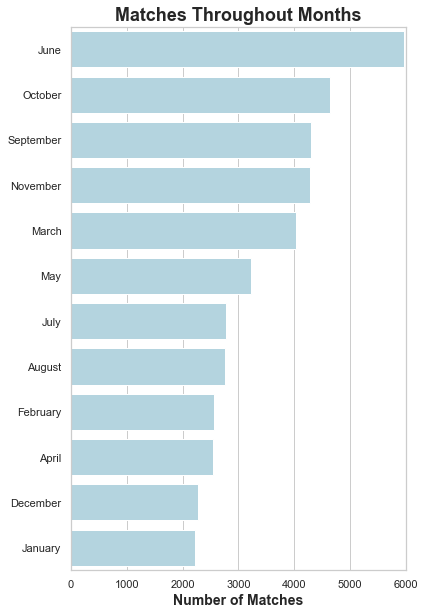

In [219]:
sns.set_theme(style="whitegrid")
sns.set_color_codes('pastel')

fig, axes = plt.subplots(figsize=(6,10))
sns.barplot(x='count', y='month', data=total_matches, color='lightblue')
axes.set_xlim((0, 6000))
axes.set_xlabel("Number of Matches", fontsize=14, fontweight='bold')
axes.set_ylabel("")
axes.set_title("Matches Throughout Months", fontsize=18, fontweight='bold')
plt.show()

## Task
Which teams played against each other the most?

In [276]:
teams = df[['home_team', 'away_team']]

In [277]:
teams['match'] = teams['home_team'] + "," + teams['away_team']

/opt/anaconda3/envs/lhl-bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [278]:
teams['match'] = teams['match'].map(lambda x: list(set(x.split(","))))

/opt/anaconda3/envs/lhl-bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
teams['match'] = teams['match'].map(lambda x: ' '.join(x))

/opt/anaconda3/envs/lhl-bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [280]:
most_seen_teams = teams.value_counts('match')

In [281]:
most_seen_teams = most_seen_teams.reset_index().head(10)
most_seen_teams.columns = ['match', 'count']

In [283]:
most_seen_teams.head(10)

,match,count
0,Uruguay Argentina,176
1,Austria Hungary,133
2,Netherlands Belgium,125
3,England Scotland,116
4,Kenya Uganda,107
5,Norway Sweden,107
6,Wales Scotland,106
7,Sweden Denmark,106
8,Brazil Argentina,104
9,Wales England,103


## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.